In [ ]:
# 🌞 Week 3 – Solar Energy Prediction Model (Plant 1)

# **Objective:**
# Train a machine learning model to predict solar energy output (DC Power) using weather data from Plant 1 and visualize AC & DC Power generation trends.

# **Tasks Covered:**
# 1. Load preprocessed data
# 2. Split into training and testing sets
# 3. Train regression models
# 4. Predict solar energy output
# 5. Compare predicted and actual values
# 6. Check model accuracy
# 🌞 Week 2 – Solar Energy Prediction Model (Plant 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
from google.colab import files
print("Upload Plant_1_Preprocessed.csv")
uploaded = files.upload()

data = pd.read_csv("Plant_1_Preprocessed.csv")
print("Data loaded successfully!")
data.head()

Upload Plant_1_Preprocessed.csv


Saving Plant_1_Preprocessed.csv to Plant_1_Preprocessed.csv
Data loaded successfully!


,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7116151.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6339380.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7007866.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6782598.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [3]:
print("Data Overview:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            68778 non-null  object 
 1   PLANT_ID             68778 non-null  int64  
 2   SOURCE_KEY_x         68778 non-null  object 
 3   DC_POWER             68778 non-null  float64
 4   AC_POWER             68778 non-null  float64
 5   DAILY_YIELD          68778 non-null  float64
 6   TOTAL_YIELD          68778 non-null  float64
 7   SOURCE_KEY_y         68778 non-null  object 
 8   AMBIENT_TEMPERATURE  68778 non-null  float64
 9   MODULE_TEMPERATURE   68778 non-null  float64
 10  IRRADIATION          68778 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.8+ MB
None

Missing Values:
 DATE_TIME              0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD     

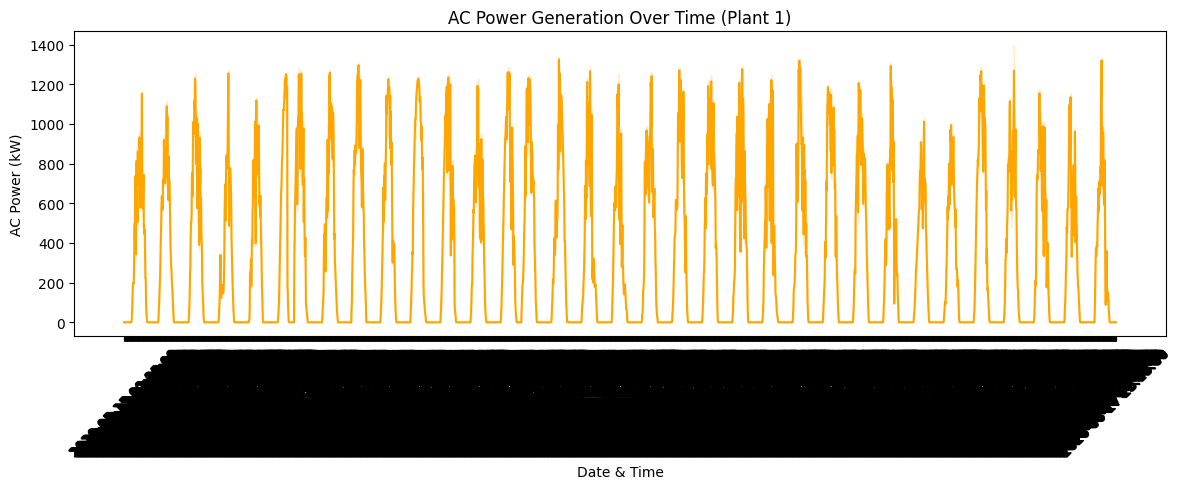

In [5]:
plt.figure(figsize=(12,5))
sns.lineplot(x='DATE_TIME', y='AC_POWER', data=data, color='orange')
plt.title('AC Power Generation Over Time (Plant 1)')
plt.xlabel('Date & Time')
plt.ylabel('AC Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

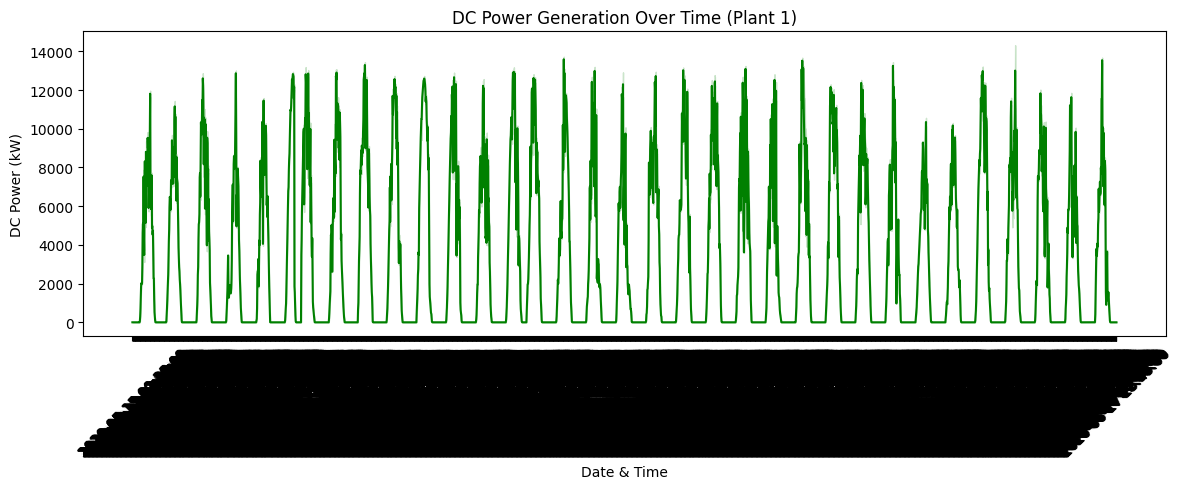

In [6]:
plt.figure(figsize=(12,5))
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=data, color='green')
plt.title('DC Power Generation Over Time (Plant 1)')
plt.xlabel('Date & Time')
plt.ylabel('DC Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

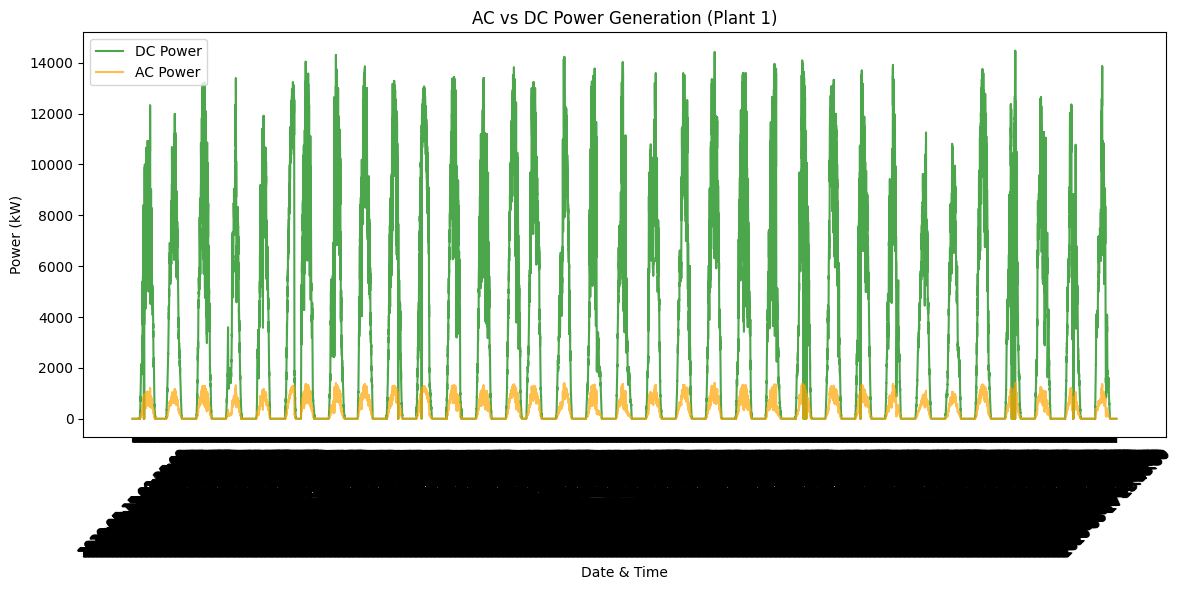

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data['DATE_TIME'], data['DC_POWER'], label='DC Power', color='green', alpha=0.7)
plt.plot(data['DATE_TIME'], data['AC_POWER'], label='AC Power', color='orange', alpha=0.7)
plt.title('AC vs DC Power Generation (Plant 1)')
plt.xlabel('Date & Time')
plt.ylabel('Power (kW)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Selecting features (independent variables) and target (dependent variable)
X = data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = data['DC_POWER']

print("Features and target variable selected")

Features and target variable selected


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split completed")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Data split completed
Training samples: 55022
Testing samples: 13756


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [11]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print("Actual vs Predicted DC Power:")
display(comparison)

Actual vs Predicted DC Power:


,Actual,Predicted
0,0.000000,98.465219
1,0.000000,68.729755
2,7349.428571,6936.197918
3,0.000000,40.659687
4,7951.000000,7749.098336
5,0.000000,84.993528
6,0.000000,73.748384
7,5658.428571,5950.602333
8,1014.857143,997.236746
9,3808.500000,3802.917535


In [12]:
# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print("Model Evaluation Results")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Model Accuracy: {accuracy:.2f}%")

Model Evaluation Results
Mean Absolute Error (MAE): 266.22
Mean Squared Error (MSE): 345096.71
R² Score: 0.9786
Model Accuracy: 97.86%


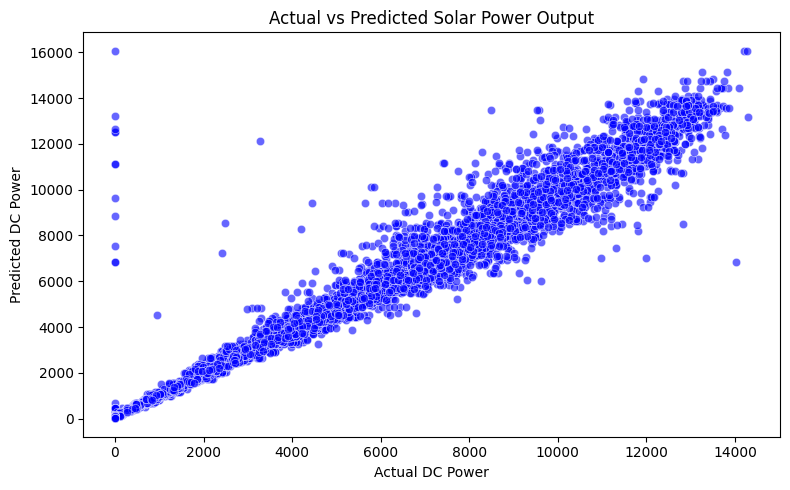

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual DC Power")
plt.ylabel("Predicted DC Power")
plt.title("Actual vs Predicted Solar Power Output")
plt.tight_layout()
plt.show()